Ce Notebook utilise la bibliothèque **SHAP** approfondir l'interpretabilité des différents modèles.

# Package & data

In [6]:
import pandas as pd
import joblib
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import shap


In [7]:
# Chargement du modèle et des données
best_player_logistic_model = joblib.load("../models/best_player/best_player_logistic_model.joblib")
best_player_decision_tree_model = joblib.load("../models/best_player/best_player_decision_tree_model.joblib")
best_player_adaboost_model = joblib.load("../models/best_player/best_player_adaboost_model.joblib")
best_player_gradient_boosting_model = joblib.load("../models/best_player/best_player_gradient_boosting_model.joblib")
best_player_lightgbm_model = joblib.load("../models/best_player/best_player_lightgbm_model.joblib")
best_player_xgboost_model = joblib.load("../models/best_player/best_player_xgboost_model.joblib")

# Assignation des différents modèles aux variables correspondantes
logistic_model = best_player_logistic_model['best_model']
decision_tree_model = best_player_decision_tree_model['best_model']
adaboost_model = best_player_adaboost_model['best_model']
gradient_boosting_model = best_player_gradient_boosting_model['best_model']
lightgbm_model = best_player_lightgbm_model['best_model']
xgboost_model = best_player_xgboost_model['best_model']

# Load split data
data_split = joblib.load("../models/best_player/best_player_split.joblib")
X_train, X_test, y_train, y_test = data_split['X_train'], data_split['X_test'], data_split['y_train'], data_split['y_test']




# Interpretability 

Dans ce notebook nous nous focaliserons sur l'interpréabilité du X_test. Il serait possible à l'avenir de la comparer avec X_train par exemple.

La méthodologie est la même pour les différents modèles : 
- création d'un explainer
- calcul des shap values
- enregistrement au format joblib

## Logistic model 

In [8]:
# Générer les valeurs SHAP pour les données de test & dump
explainer = shap.Explainer(logistic_model, X_test)
shap_values = explainer(X_test)

joblib.dump(shap_values, '../models/shap_values/shap_values_logistic_model.joblib')


['../models/shap_values/shap_values_logistic_model.joblib']

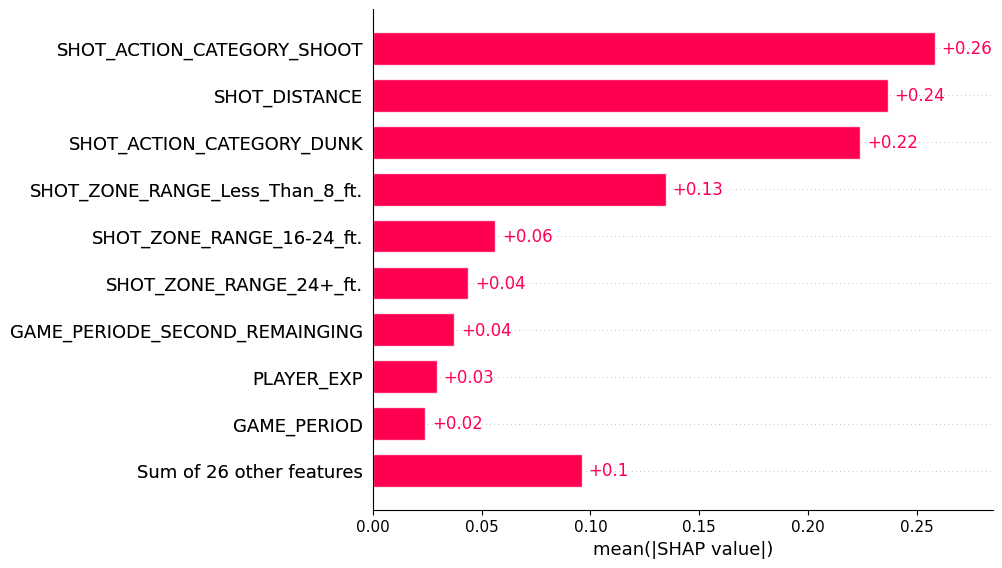

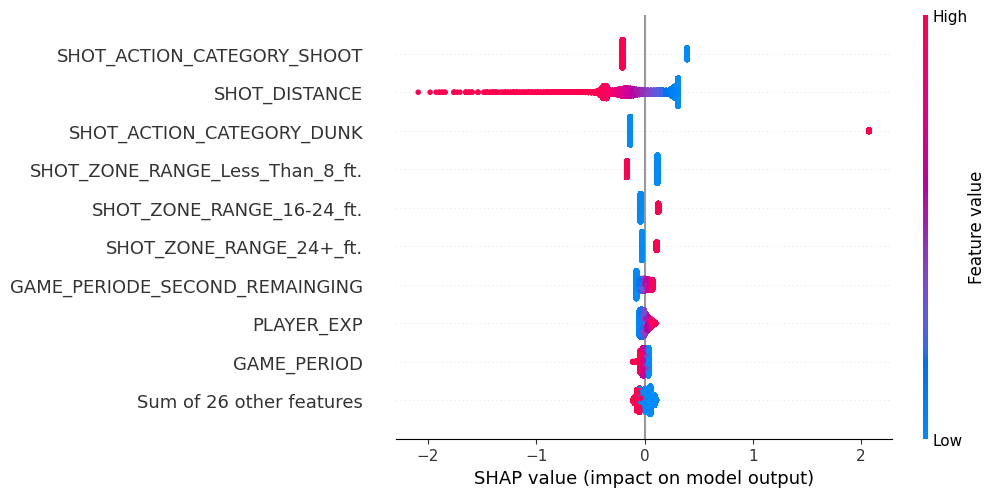

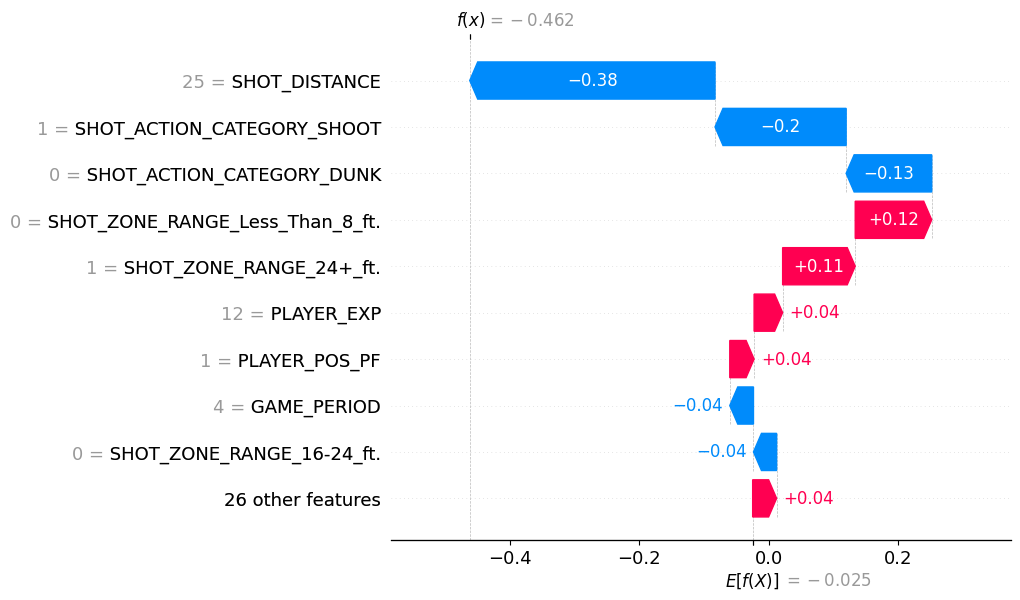

In [9]:
# Import shap values
shap_values = joblib.load('../models/shap_values/shap_values_logistic_model.joblib')

# Global
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)

# Local
shap.plots.waterfall(shap_values[0])
shap.initjs()
shap.plots.force(shap_values[0])



## Decision Tree

In [10]:
# Générer les valeurs SHAP pour les données de test & dump
explainer = shap.TreeExplainer(decision_tree_model)
shap_values = explainer.shap_values(X_test)
joblib.dump(shap_values, '../models/shap_values/shap_values_decision_tree_model.joblib')


['../models/shap_values/shap_values_decision_tree_model.joblib']

[Text(0.5, 0.9, 'SHOT_ACTION_CATEGORY_SHOOT <= 0.067\ngini = 0.498\nsamples = 233873\nvalue = [125100, 108773]'),
 Text(0.25, 0.7, 'SHOT_ACTION_CATEGORY_DUNK <= 0.916\ngini = 0.465\nsamples = 68278\nvalue = [25131, 43147]'),
 Text(0.125, 0.5, 'PLAYER_WEIGHT <= 102.458\ngini = 0.489\nsamples = 57469\nvalue = [24421, 33048]'),
 Text(0.0625, 0.3, 'PLAYER_POS_SF <= 0.377\ngini = 0.494\nsamples = 34113\nvalue = [15165, 18948]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'PLAYER_WEIGHT <= 111.794\ngini = 0.478\nsamples = 23356\nvalue = [9256, 14100]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'PLAYER_HEIGHT <= 194.552\ngini = 0.123\nsamples = 10809\nvalue = [710, 10099]'),
 Text(0.3125, 0.3, 'PLAYER_WEIGHT <= 94.415\ngini = 0.172\nsamples = 1773\nvalue = [169, 1604]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'PLAYER_POS_PG <= 0.728\n

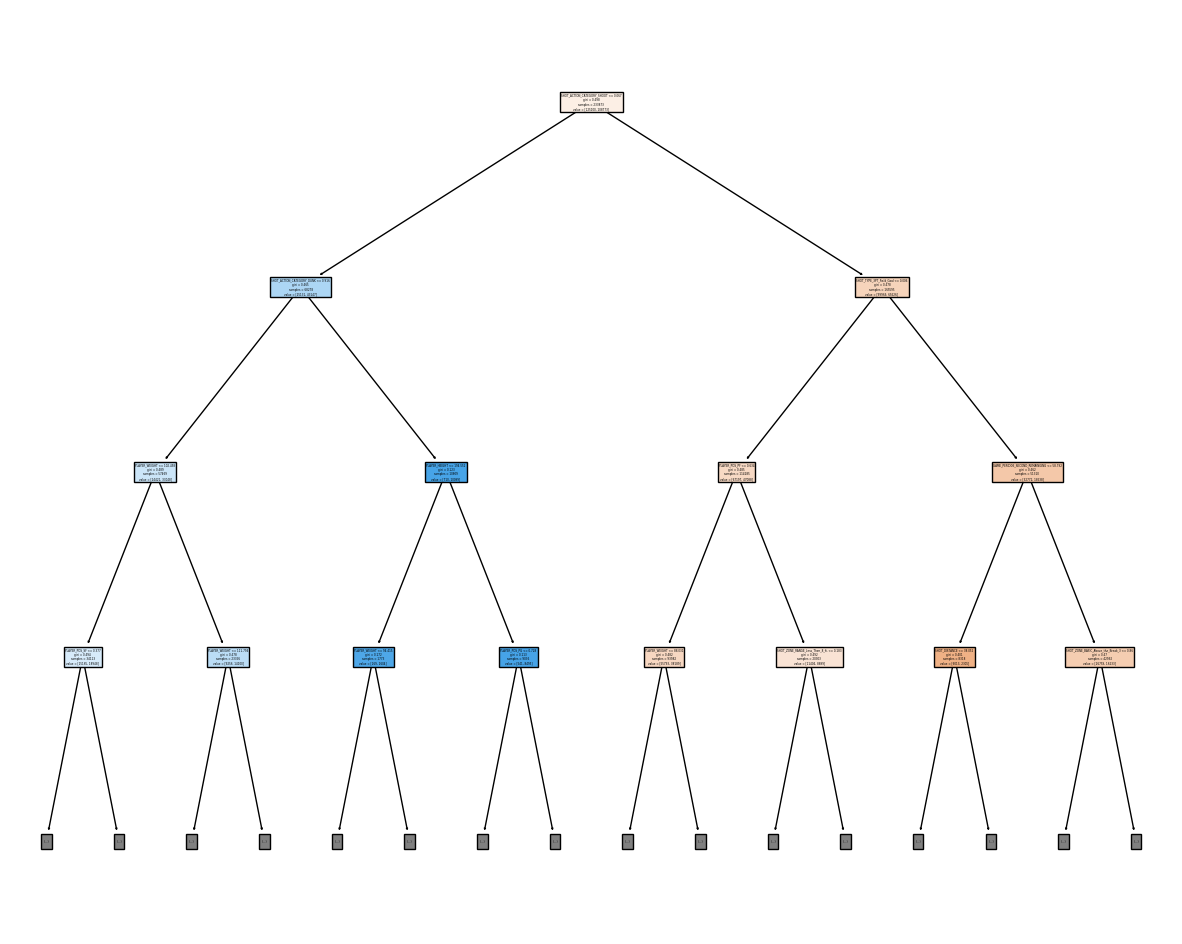

In [11]:
# Import shap values
shap_values = joblib.load('../models/shap_values/shap_values_decision_tree_model.joblib')

# global
plt.figure(figsize=(15,12))
plot_tree(decision_tree_model, feature_names=X_test.columns.tolist(), filled=True, max_depth=3)


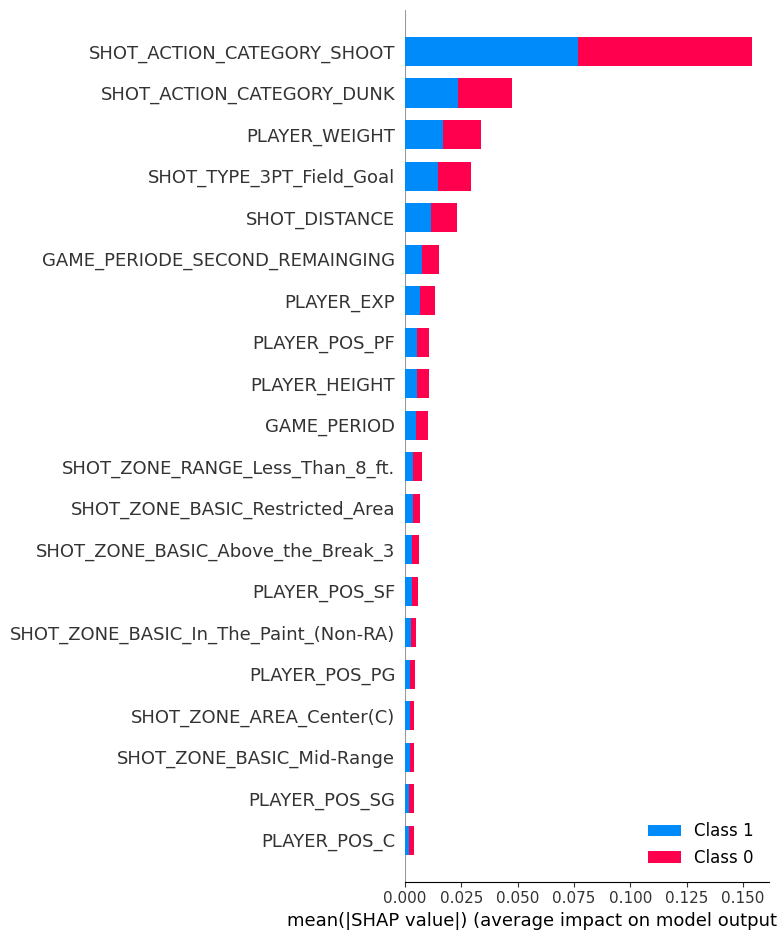

In [12]:
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)


## Ada Boost Model

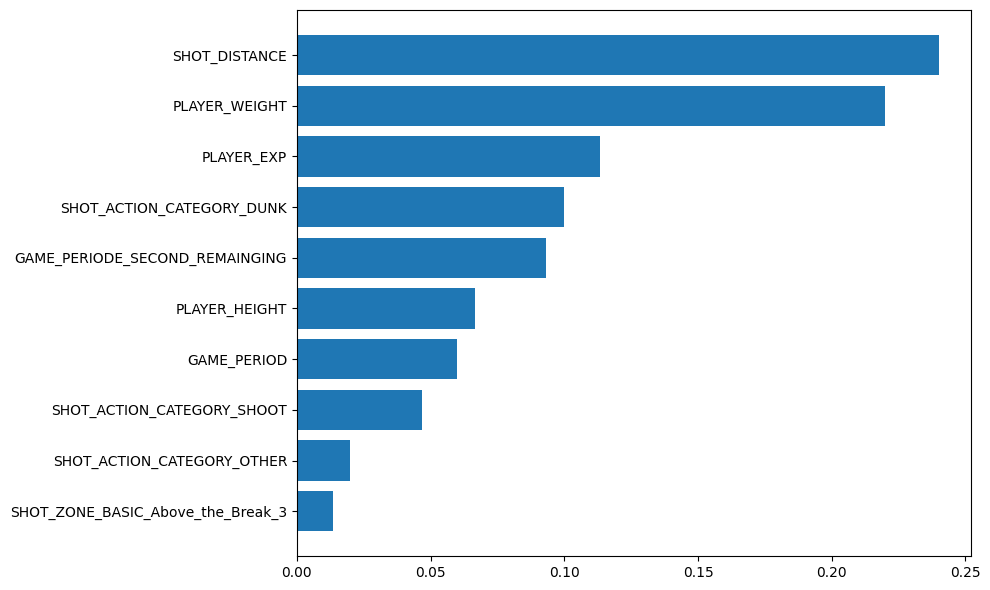

In [13]:
# Global
feature_importance = adaboost_model.feature_importances_
df_feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=True).tail(10)

plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'])
plt.tight_layout()
plt.show()

## Gradient Boosting Model

In [14]:
# Générer les valeurs SHAP pour les données de test & dump
explainer = shap.TreeExplainer(gradient_boosting_model, X_test)
shap_values = explainer(X_test)
joblib.dump(shap_values, '../models/shap_values/shap_values_gradient_boosting_model.joblib')

100%|===================| 58355/58469 [05:00<00:00]        

['../models/shap_values/shap_values_gradient_boosting_model.joblib']

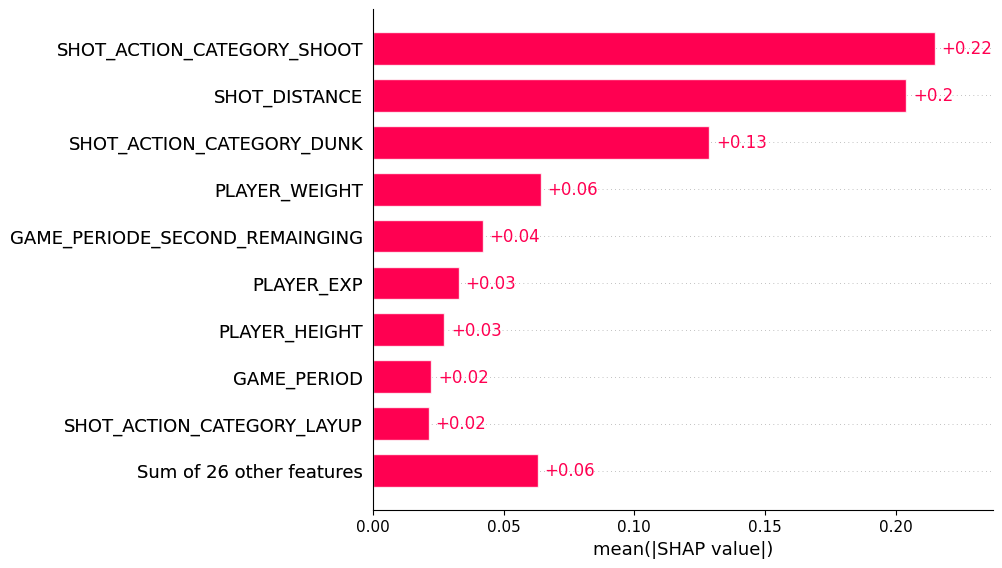

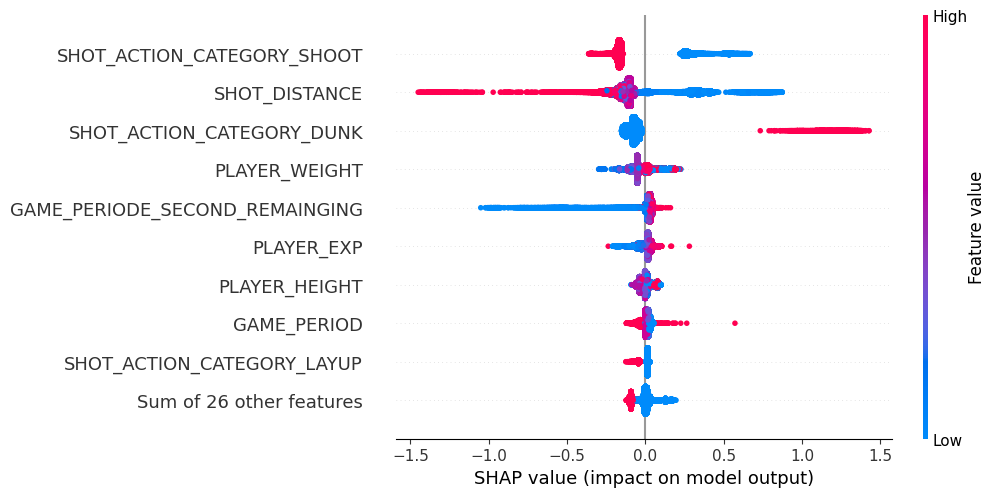

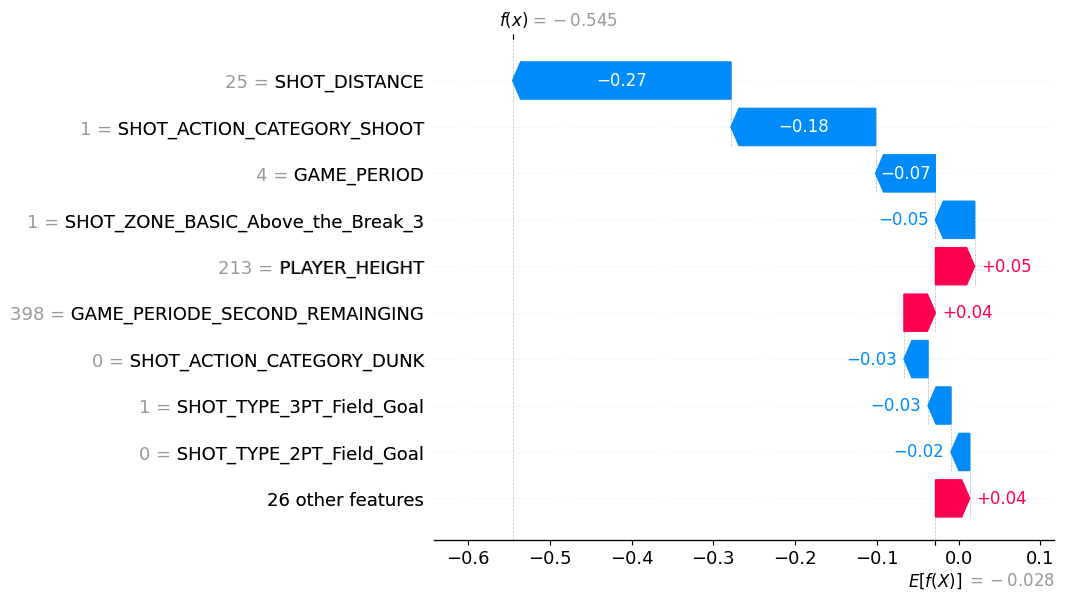

In [15]:
# Import shap values
shap_values = joblib.load('../models/shap_values/shap_values_gradient_boosting_model.joblib')

# Global
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)

# Local
shap.plots.waterfall(shap_values[0])
shap.initjs()
shap.plots.force(shap_values[0])



## Light GBM model

In [16]:
# Générer les valeurs SHAP pour les données de test & dump
explainer = shap.TreeExplainer(lightgbm_model, X_test)
shap_values = explainer(X_test)
joblib.dump(shap_values, '../models/shap_values/shap_values_lightgbm_model.joblib')

100%|===================| 58376/58469 [04:24<00:00]        

['../models/shap_values/shap_values_lightgbm_model.joblib']

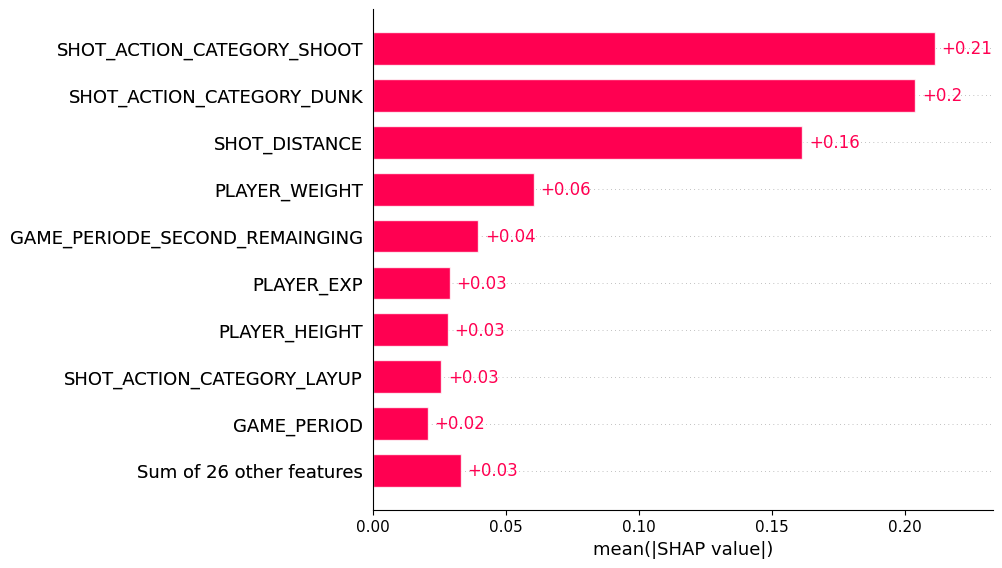

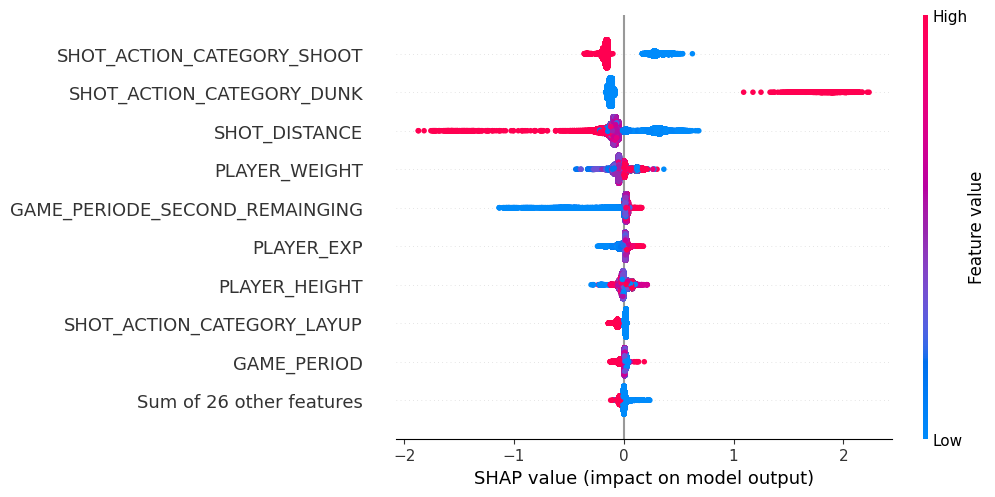

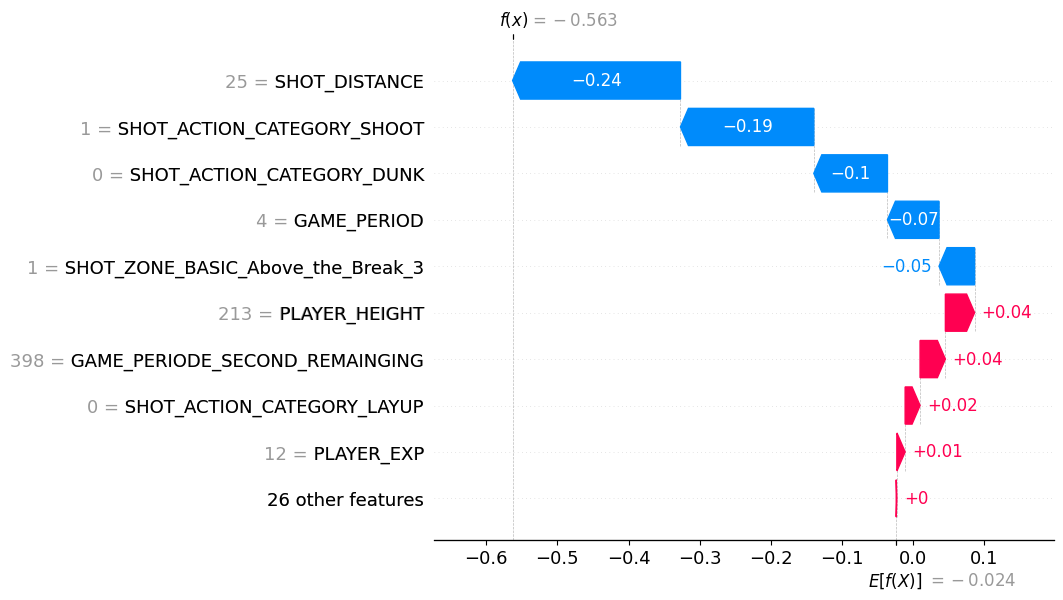

In [17]:
# Import shap values
shap_values = joblib.load('../models/shap_values/shap_values_lightgbm_model.joblib')

# Global
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)

# Local
shap.plots.waterfall(shap_values[0])
shap.initjs()
shap.plots.force(shap_values[0])


## XG Boost model

In [18]:
# Générer les valeurs SHAP pour les données de test & dump
explainer = shap.TreeExplainer(xgboost_model, X_test)
shap_values = explainer(X_test)
joblib.dump(shap_values, '../models/shap_values/shap_values_xgboost_model.joblib')

[19:34:32] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
100%|===================| 58377/58469 [04:48<00:00]        

['../models/shap_values/shap_values_xgboost_model.joblib']

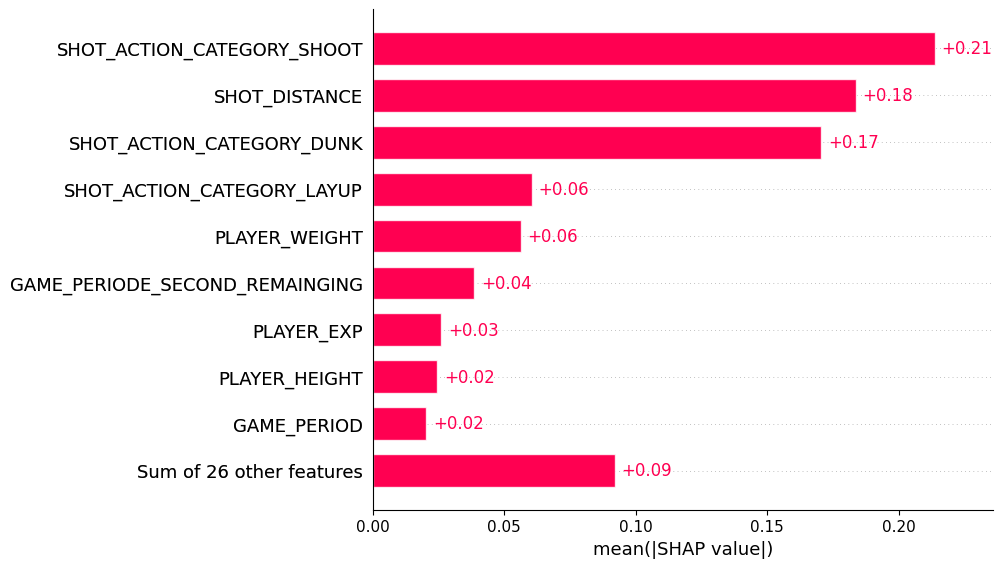

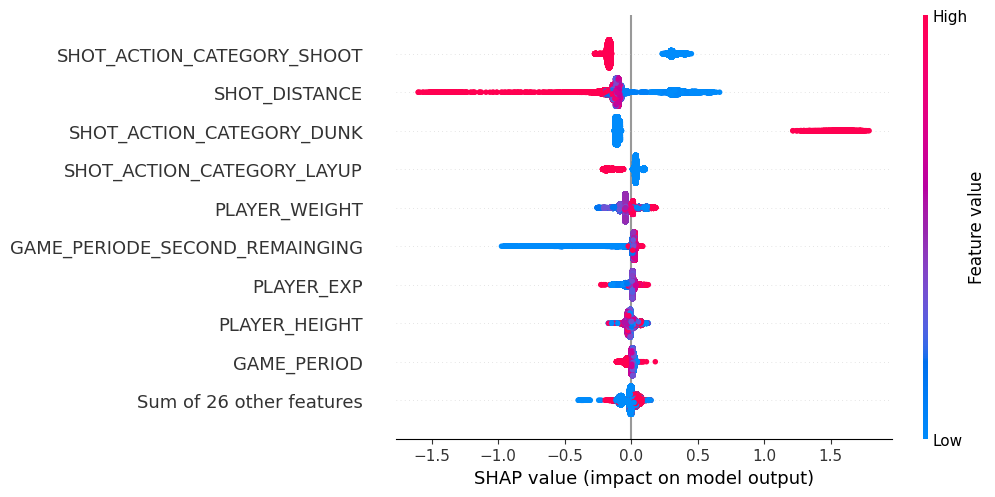

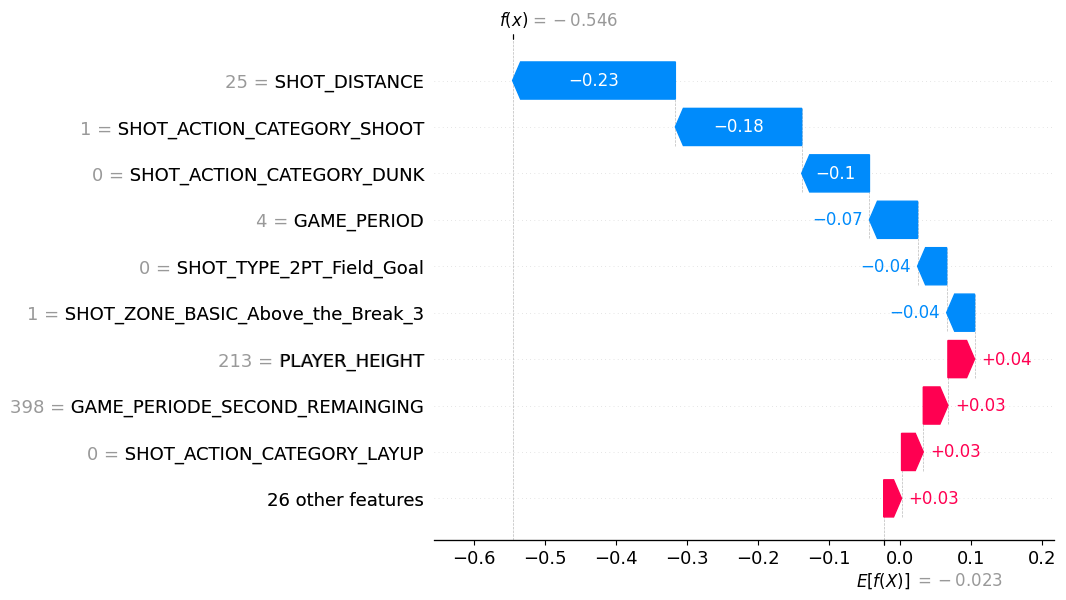

In [19]:
# Import shap values
shap_values = joblib.load('../models/shap_values/shap_values_xgboost_model.joblib')

# Global
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)

# Local
shap.plots.waterfall(shap_values[0])
shap.initjs()
shap.plots.force(shap_values[0])
